In [231]:
import numpy as np
import pandas as pd
import os
import collections
from pandas.core.reshape.merge import merge
import matplotlib.pyplot as plt
os.chdir('C:\\Users\\ellas\\Downloads')
import nltk.corpus #Import the nltk.corpus submodule


In [232]:
storm = pd.read_csv('Ethos_Dataset_Multi_Label (2).csv', sep = ';')
storm = storm.drop_duplicates()
storm

,comment,violence,directed_vs_generalized,gender,race,national_origin,disability,religion,sexual_orientation
0,You should know women's sports are a joke,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,You look like Sloth with deeper Down’s syndrome,0.000000,0.833333,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,You look like Russian and speak like Indian. B...,1.000000,0.500000,0.142857,0.142857,0.714286,0.000000,0.000000,0.000000
3,"Women deserve to be abused, I guess.",0.666667,0.166667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Women are made for making babies and cooking d...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
428,All people are fucked up because of these quee...,0.000000,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000,0.571429
429,Actually THIS WEIRD PEOPLE are HARMFUL! They n...,0.000000,1.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000
430,ABU DA BI ABA DU BA BA HAMUD! See? I’m an arab...,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.857143,0.000000
431,a homo? so you fuck your brother instead of yo...,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Questions of interest
1. What percentage of these tweets are being flagged for race, national origin, violence, directed?
2. What percentage of these tweets are being flagged for intent and violence? 
3. What racial/ethnic groups are being targeted in the tweets flagged for both intent and violence

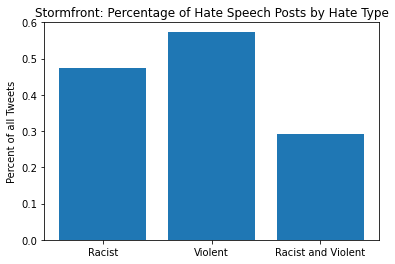

In [234]:
#Percentage Flagged for offensive nationality language and offensive racial language 
a=0
for x in range(len(storm.race)):
    if (storm.national_origin[x] != 0  or storm.race[x] != 0):
        a=a+1
natrac = a/len(storm.race)

#Violence:
collections.Counter(storm.violence != 0)
vio = 248/len(storm.national_origin)

#Percentage of nationality language and/or offensive racial language which are also violent:
lst = []
b=0
for x in range(len(storm.race)):
    if ((storm.national_origin[x] != 0  or storm.race[x] != 0) and storm.violence[x] != 0):
        b=b+1
racvio = b/len(storm.national_origin)

#Barplot to display results:
multi= {'Racist':natrac, 'Violent': vio, 'Racist and Violent': racvio}
multi
plt.bar(multi.keys(), multi.values()) 
plt.ylabel("Percent of all Tweets")
plt.ylim(0, .6)
plt.title("Stormfront: Percentage of Hate Speech Posts by Hate Type")
plt.show()

In [235]:
#Percentage flagged for violence which have offensive nationality language
lst = []
for x in range(len(storm.race)):
    trufal = (storm.national_origin[x] != 0 and storm.violence[x] != 0)
    lst.append(trufal)
collections.Counter(lst)
natvio = 86/229

#Percentage Flagged for violence which have offensive racial language
lst = []
for x in range(len(storm.race)):
    trufal = (storm.race[x] != 0 and storm.violence[x] != 0)
    lst.append(trufal)
collections.Counter(lst)
racvio = 80/297

#Percentage Flagged for offensive racial language which are also violent
lst = []
for x in range(len(storm.race)):
    trufal = (storm.directed_vs_generalized[x] != 0 and storm.violence[x] != 0)
    lst.append(trufal)
collections.Counter(lst)
dirvio = 146/185

#Percentage Flagged for being directed which also have offensive nationality language 
lst = []
for x in range(len(storm.race)):
    trufal = (storm.national_origin[x] != 0 and storm.directed_vs_generalized[x] != 0)
    lst.append(trufal)
collections.Counter(lst)
natdir = 73/229

#Percentage Flagged for being directed which also have offensive racial language 
lst = []
for x in range(len(storm.race)):
    trufal = (storm.race[x] != 0 and storm.directed_vs_generalized[x] != 0)
    lst.append(trufal)
collections.Counter(lst)
racdir = 70/297

#Percentage Flagged for offensive nationality language and offensive racial language 
a=0
for x in range(len(storm.race)):
    if (storm.national_origin[x] != 0  or storm.race[x] != 0):
        a=a+1
natrac = a/len(storm.race)

#Percentage of nationality language and/or offensive racial language which are also violent
lst = []
for x in range(len(storm.race)):
    trufal = ((storm.national_origin[x] != 0  or storm.race[x] != 0) and storm.violence[x] != 0)
    lst.append(trufal)
collections.Counter(lst)
natracvio = 126/len(storm.race)

#Percentage of nationality language and/or offensive racial language which are also violent and directed
lst = []
for x in range(len(storm.race)):
    trufal = ((storm.national_origin[x] != 0  or storm.race[x] != 0) and storm.violence[x] != 0 and  storm.directed_vs_generalized[x] != 0)
    lst.append(trufal)
collections.Counter(lst)
natracviodir = 69/205

In [236]:
vio

0.5727482678983834

Key findings:
- 47% of all posts are flagged for race or nationality
- 29% of posts were flagged for race or nationality and violence
- 33.7% of posts flagged for race or nationality were also flagged as violent and directed.
- Overall high rate of violent posts, about 57% of all posts were violent

In [287]:
lst=[]
for x in range(len(storm.race)):
    if (storm.national_origin[x] != 0  or storm.race[x] != 0):
        lst.append(storm.comment[x])
lst=str(lst)
lst #This is a list of all the comments flagged for racial or nationality and violence and direction
lst = lst.replace("!", '') 
lst = lst.replace(".", '') 
lst = lst.replace("'", '') 
lst = lst.replace("(", '') 
lst = lst.replace(")", '')
lst = lst.replace(",", '')
lst = lst.lower() #Removed the puncation and set to lower case

In [288]:
#Stopword Removal
words = nltk.word_tokenize(lst)
stopwords = ['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your',
             'yours','yourself','yourselves','it',"it's",'its','itself','they','them','their','theirs','themselves',
             'what','which','who','whom','this','that',"that'll",'these','those','am','is','are','was','were','be',
             'been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if',
             'or','because','as','until','while','of','at','by','for','with','about','against','between','into',
             'through','during','before','after','above','below','to','from','up','down','in','out','on','off',
             'over','under','again','further','then','once','here','there','when','where','why','how','all','any',
             'both','each''few','more','most','other','some','such','no','nor','not','only','own','same','so',
             'than','too','very','s','t','can','will','just','don',"don't",'should',"should've",'now','d','ll','m',
             'o','re','ve','y','ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',
             "hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",
             'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',
             "won't",'would','wouldn',"wouldn't"]

words = [w for w in words if w not in stopwords]

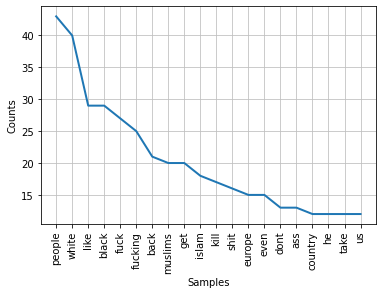

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [289]:
#Word Frequency of violent racist posts
fq = nltk.FreqDist(w for w in words if w.isalnum())
fq.plot(20)

Text(0.5, 1.0, 'Stormfront: Racial Groups Receiving Violent and Targeted Posts')

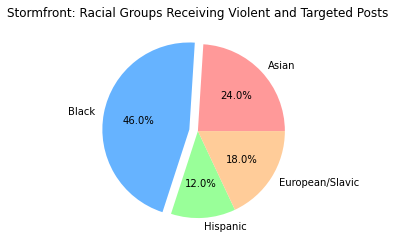

In [290]:
#Of the racist posts which are violent and targeted, these are the ethnic groups targeted

labels = ['Asian', 'Black', 'Hispanic',  'European/Slavic']
sizes = [.24, .46, .12, .18]
explode = [0, .1, 0, 0]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',  '#c2c2f0','#ffb3e6']

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title("Stormfront: Racial Groups Receiving Violent and Targeted Posts")


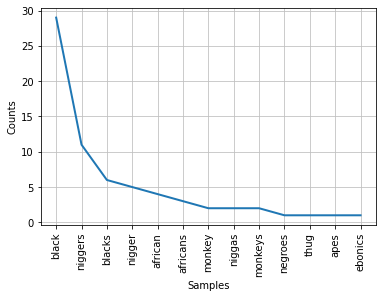

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [292]:
asian = ['black', 'coon', 'coons','niglet', 'monkey', 'monkeys', 'negroes', 'negro', 'thug', 'negroe',  'negroes', 'negros', 'nigger', 
         'blacks', 'niggers', 'apes', 'african', 'africans', 'niggas', 'ebonics', 'monkeys', 'chimps', 'negroid', 'ghetto']

rea = [w for w in words if w in asian]
fq_rea = nltk.FreqDist(w for w in rea if w.isalnum())
fq_rea.plot(20)